# 34: Clustering

## Agenda:
- Unsupervised Learning
- K-Means Clustering
- Hierarchical Agglomerative Clustering

## Supervised Vs Unsupervised Learning.
In supervised learning, the system tries to learn from the previous examples that are given. (On the other hand, in unsupervised learning, the system attempts to find the patterns directly from the example given.) So if the dataset is labelled it comes under a supervised problem, it the dataset is unlabelled then it is an unsupervised problem.

![alt text](https://cdn-images-1.medium.com/max/800/1*AZMDyaifxGVdwTV-1BN7kA.png)

### Clustering
In clustering, the data is divided into several groups. In plain words, the aim is to segregate groups with similar traits and assign them into clusters.



![clustering](https://cdn-images-1.medium.com/max/800/1*58tBPk4oZqhZ-LUq-0Huow.jpeg)

### Clustering Types
Clustering can be broadly divided into two subgroups:

**Hard clustering**: in hard clustering, each data object or point either belongs to a cluster completely or not. For example in clustering NYC locations, each location belongs to either one borough or the other.

**Soft clustering**: in soft clustering, a data point can belong to more than one cluster with some probability or likelihood value. For example, you could identify some locations as the border points belonging to two or more boroughs.

### Clustering Algorithms

**Centroid-based clustering**: in this type of clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. This is an iterative clustering algorithms in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. k-means is a centroid based clustering, and will you see this topic more in detail later on in the tutorial.

**Connectivity-based clustering**: the main idea behind this clustering is that data points that are closer in the data space are more related (similar) than to data points farther away. The clusters are formed by connecting data points according to their distance. At different distances, different clusters will form and can be represented using a dendrogram, which gives away why they are also commonly called "hierarchical clustering". These methods do not produce a unique partitioning of the dataset, rather a hierarchy from which the user still needs to choose appropriate clusters by choosing the level where they want to cluster. They are also not very robust towards outliers, which might show up as additional clusters or even cause other clusters to merge.


In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

# Importing data
url = 'https://raw.githubusercontent.com/mubaris/friendly-fortnight/master/xclara.csv'
data = pd.read_csv(url)

# K-Means Clustering
* Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Takes K number of centroids or data points in its account initially.
After choosing the centroids, (say C1 and C2) the data points (coordinates here) are assigned to any of the Clusters (let’s take centroids = clusters for the time being) depending upon the distance between them and the centroids.

For measuring the distances, you take the following distance measurement function (also termed as similarity measurement function):

$$d = |x2 – x1| + | y2 – y1| + |z2 – z1|$$

This is also known as the Taxicab distance or Manhattan distance, where d is distance measurement between two objects, (x1,y1,z1) and (x2,y2,z2) are the X, Y and Z coordinates of any two objects taken for distance measurement.

The algorithm will continue updating cluster centroids (i.e the coordinates) until they cannot be updated anymore. The new centroids are determined by:

![centroid_update](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526380253/CodeCogsEqn_v5le8c.png)

(where n = number of objects belonging to that particular cluster)

The algorithm no longer updates the centroids when there is no change in the current cluster formation.

### Examples using different initial centroids

### 1. Left

<img src="http://drive.google.com/uc?export=view&id=1rQsgwmbeKsf9lgAv4onHJQMNqYcXZ1cr" width="500"> 

### 2. Right

<img src="http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui" width="500"> 

### 3. Top

<img src="http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui" width="500"> 

### 4. Bottom

<img src="http://drive.google.com/uc?export=view&id=1duSB73v8ugD5liZyn5dUeSOgwvAbdgui" width="500"> 

In [9]:
display(data)
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
display(data.describe())

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [11]:
# the coordinates of the centers is an attribute
kmeans.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 31.77293322,  59.66136158],
       [  9.43391214,  10.63898036],
       [ 48.12019572,  59.67243019]])

In [12]:
kmeans.predict(data)

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [24]:
results = pd.concat([data, pd.Series(kmeans.predict(data)).rename('cluster')], axis=1)
display(results)
results.cluster.value_counts()

,V1,V2,cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2
...,...,...,...
2995,85.652800,-6.461061,0
2996,82.770880,-2.373299,0
2997,64.465320,-10.501360,0
2998,90.722820,-12.255840,0


0    952
2    897
3    625
1    526
Name: cluster, dtype: int64

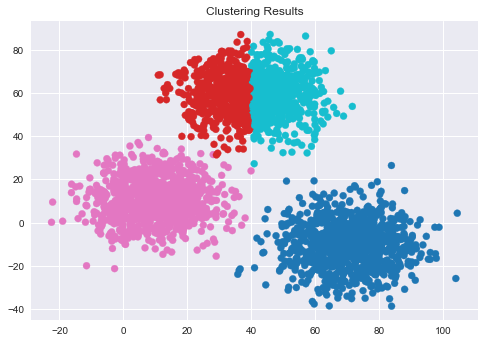

In [21]:
plt.scatter(results.iloc[:,0], results.iloc[:,1], c=results.iloc[:,2], cmap=cmap)
plt.title('Clustering Results')
plt.show()

## Finding Best K

### WSS Elbow Method

* The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized
* The total WSS measures the compactness of the clustering and we want it to be as small as possible.
* The elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve the total WSS by much


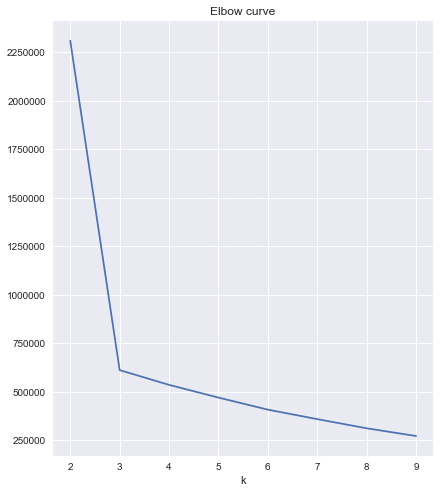

In [7]:
# Specifying the dataset and initializing variables
wss = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), wss)
plt.grid(True)

* We look for the "elbow" of the graph - where the marginal decrease in WSS is subsequently reduced
* Based on the above graph, best k is 3

### Silhouette coefficient

* The **Average Silhouette** approach measures the **quality of clusters** - how well each object lies within its cluster by estimating the average distance between clusters
* A silhouette value is a measure of how similar **one data point** is to its own cluster (cohesion) compared to other clusters (separation)
* The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters
* If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.


* The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance


In [8]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(data)
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    silhouette_plot.append(silhouette_avg)

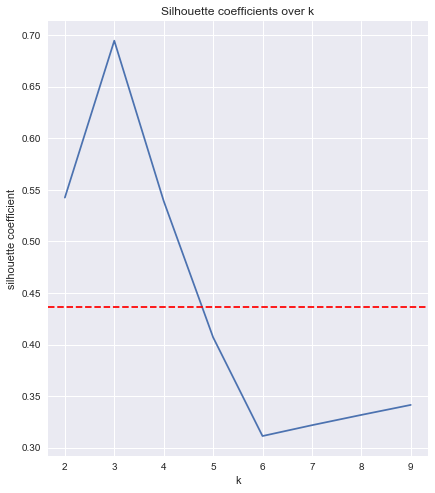

In [25]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

### Struggles of K-means
- http://varianceexplained.org/r/kmeans-free-lunch/
- Demonstrates the ideal K-means dataset
- Show three scenarios where K-means struggles

## Hierarchical Agglomerative Clustering (HAC)

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

* Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level
* Initially, every observation is its own cluster
* Then, the most similar pairs of observations form a cluster together, and the next most similar groups fuse together and we continue this pattern until you have one big cluster. 
* We end up with a tree-like diagram called a **dendrogram**, which allows us to view the clusters obtained for each possible number of clusters, from 1 to n
* We use our discretion to decide where to cut off the dendogram, determining the number of clusters



### Versus K-Means
* Recall the goal of K-means clustering: to assign individual observations to pre-specified number of clusters according to the distance between the centroid and the observation
* One disadvantage of K-means clustering is that we have to specify the number of clusters beforehand, and we don't have to do this with HAC


### Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationships into consideration
- Allows us to look at a dendrogram to help decide the best number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on

In [26]:
# code credit -- https://github.com/amueller/mglearn/tree/master/mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity


def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=12)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(20, 8))

    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("Step %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("Initialization")


def plot_agglomerative():
    X, y = make_blobs(random_state=0, n_samples=12)
    agg = AgglomerativeClustering(n_clusters=3)

    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    ax = plt.gca()
    for i, x in enumerate(X):
        ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

    ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
    ax.set_xticks(())
    ax.set_yticks(())

    for i in range(11):
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)

        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

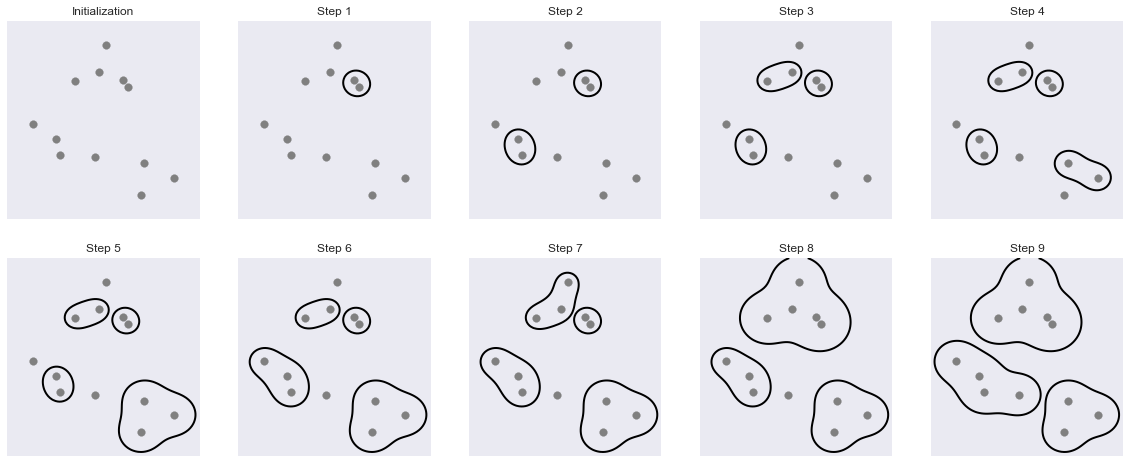

In [27]:
plot_agglomerative_algorithm()

## Types of HAC

#### Single Linkage 
-  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 

![single](https://www.saedsayad.com/images/Clustering_single.png)

#### Complete Linkage
-  Nearest may be defined as the furthest (or maximum) distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.

![completeLinkage](https://www.saedsayad.com/images/Clustering_complete.png)

#### Average Linkage
- The distance between clusters is defined as the average distance between the average values of each of the data points in the clusters. 

![AVERAGELINKAGE](https://www.saedsayad.com/images/Clustering_average.png)

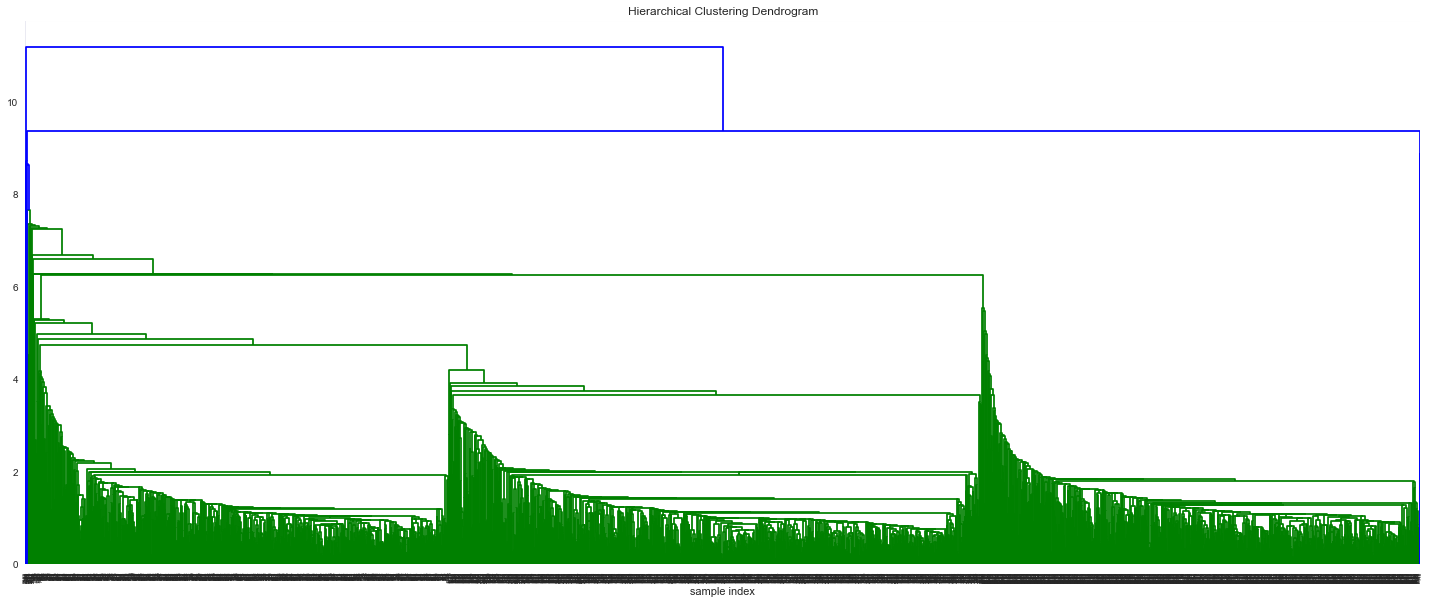

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, 'single')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=5.,  # font size for the x axis labels
)
plt.show()

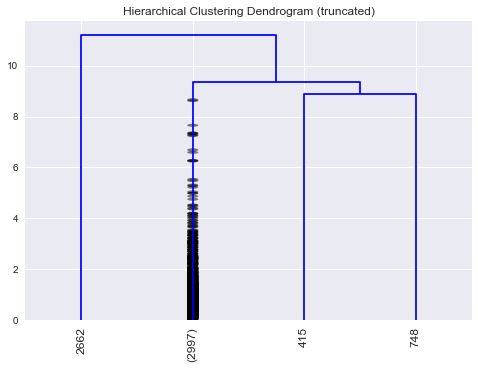

In [64]:
# trimming and truncating the dendrogram 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    show_leaf_counts=True, # or else show the index 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

# to compare the clustering results
kmeans_clusters = KMeans(n_clusters=4).fit_predict(data)

hac = AgglomerativeClustering(n_clusters=4)
hac_clusters = hac.fit_predict(data)

results = pd.concat([data, pd.Series(kmeans_clusters).rename('kmeans'), pd.Series(hac_clusters).rename('hac')], axis=1)

In [34]:
results

,V1,V2,kmeans,hac
0,2.072345,-3.241693,0,2
1,17.936710,15.784810,0,2
2,1.083576,7.319176,0,2
3,11.120670,14.406780,0,2
4,23.711550,2.557729,0,2
...,...,...,...,...
2995,85.652800,-6.461061,2,0
2996,82.770880,-2.373299,2,0
2997,64.465320,-10.501360,2,0
2998,90.722820,-12.255840,2,0


## Comparing Clustering Results

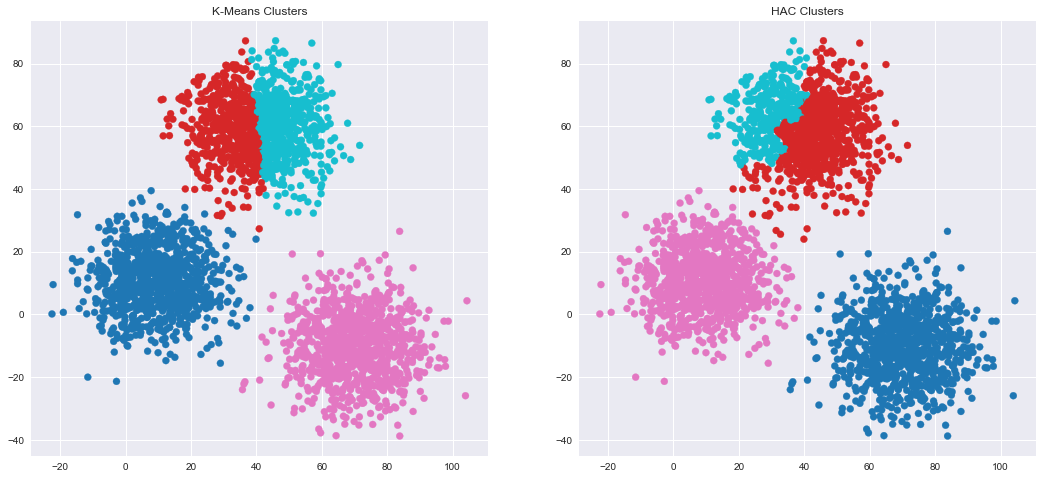

In [48]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))

ax0.scatter(results.V1, results.V2, c = results.kmeans, cmap=cmap)
ax0.title.set_text('K-Means Clusters')

ax1.scatter(results.V1, results.V2, c = results.hac, cmap=cmap)
ax1.title.set_text('HAC Clusters')

## HAC with different k values

Notice that as the number of clusters decrease, sub-clusters merge together!

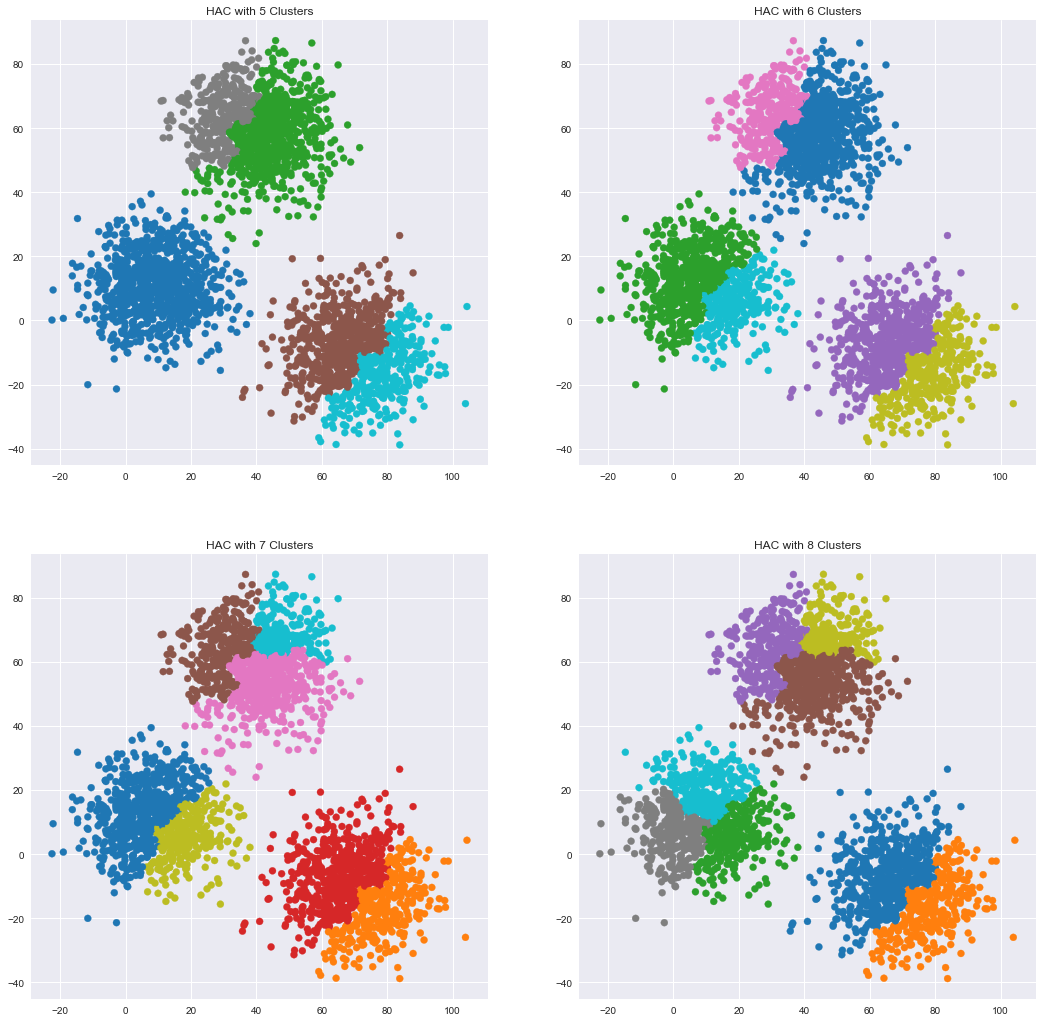

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(18,18))

for i in range(len(axes.flatten())):
    ax = axes.flatten()[i]
    ax.scatter(results.V1, results.V2, 
               c = AgglomerativeClustering(n_clusters=i+5).fit_predict(data), 
               cmap = cmap
              )
    ax.title.set_text(f'HAC with {i+5} Clusters')

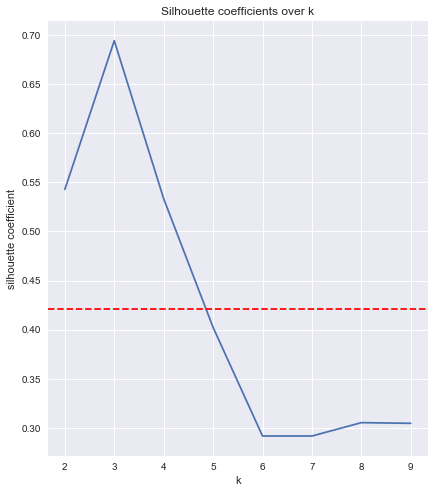

In [59]:
silhouette_plot = []
for k in range(2, 10):
    clusters = AgglomerativeClustering(n_clusters=k)
    cluster_labels = clusters.fit_predict(data)
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    silhouette_plot.append(silhouette_avg)

# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

# In Summary

* K-Means is a centroid-based clustering method while HAC is a connectivity-based clustering method
* K-Means has an element of randomness while HAC does not
* In context, you want to examine the data points in each cluster to manually label them